In [2]:
print('hi')

hi


In [3]:
import requests
import json

api_key = "XtWfn0d5ooMWIVs5AQMxOAb474Km-hs7"
url = f"https://api.g.alchemy.com/prices/v1/{api_key}/tokens/historical"

payload = {
    "network": "eth-mainnet",
    "address": "0xE0f63A424a4439cBE457D80E4f4b51aD25b2c56C",
    "startTime": "2025-06-24T00:00:00Z",
    "endTime": "2025-06-26T23:59:59Z",
    "interval": "5m"
}

response = requests.post(url, json=payload)
print("Status:", response.status_code)
print("Response Text:", response.text)


Status: 200
Response Text: {"network":"eth-mainnet","address":"0xE0f63A424a4439cBE457D80E4f4b51aD25b2c56C","currency":"usd","data":[{"value":"1.2216596092","timestamp":"2025-06-24T00:00:30Z"},{"value":"1.2185378663","timestamp":"2025-06-24T00:05:23Z"},{"value":"1.2151680731","timestamp":"2025-06-24T00:10:11Z"},{"value":"1.213719931","timestamp":"2025-06-24T00:15:13Z"},{"value":"1.2026286128","timestamp":"2025-06-24T00:20:17Z"},{"value":"1.2027295196","timestamp":"2025-06-24T00:26:27Z"},{"value":"1.2017709382","timestamp":"2025-06-24T00:31:29Z"},{"value":"1.2002876266","timestamp":"2025-06-24T00:36:22Z"},{"value":"1.2103069153","timestamp":"2025-06-24T00:41:24Z"},{"value":"1.1995394265","timestamp":"2025-06-24T00:46:31Z"},{"value":"1.1972557387","timestamp":"2025-06-24T00:51:28Z"},{"value":"1.199445621","timestamp":"2025-06-24T00:56:31Z"},{"value":"1.1997424595","timestamp":"2025-06-24T01:00:08Z"},{"value":"1.1999068428","timestamp":"2025-06-24T01:04:57Z"},{"value":"1.2018836576","times

In [4]:
import pandas as pd

# Extract data safely
response_json = response.json()
raw_data = response_json.get("data", [])

# Build dataframe
df = pd.DataFrame([
    {
        "timestamp": entry["timestamp"],
        "price": float(entry["value"])
    }
    for entry in raw_data
])

# Convert timestamp to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)

# Show preview
df.head()


,price
timestamp,
2025-06-24 00:00:30+00:00,1.221660
2025-06-24 00:05:23+00:00,1.218538
2025-06-24 00:10:11+00:00,1.215168
2025-06-24 00:15:13+00:00,1.213720
2025-06-24 00:20:17+00:00,1.202629


In [5]:
df.shape

(745, 1)

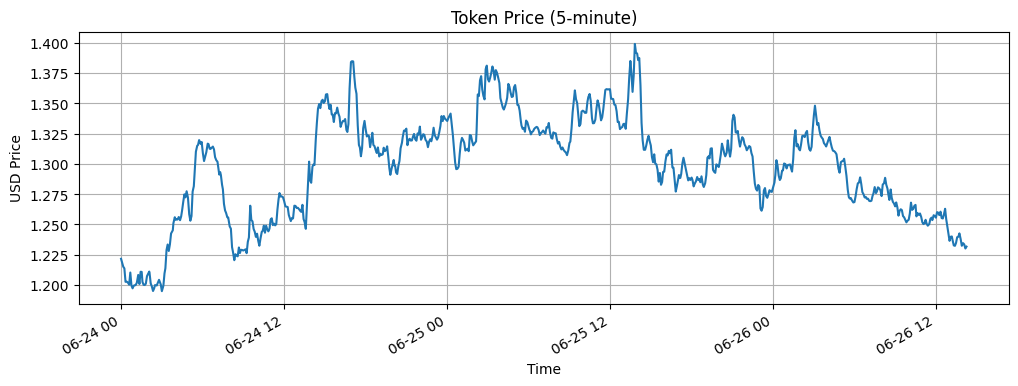

In [6]:
import matplotlib.pyplot as plt

df["price"].plot(figsize=(12, 4), title="Token Price (5-minute)")
plt.ylabel("USD Price")
plt.xlabel("Time")
plt.grid(True)
plt.show()


In [7]:
import requests
import json

api_key = "XtWfn0d5ooMWIVs5AQMxOAb474Km-hs7"
url = f"https://api.g.alchemy.com/prices/v1/{api_key}/tokens/historical"

payload = {
    "network": "eth-mainnet",
    "address": "0x5a9a835a394e96d1ce83a431f804a39d85670cb1",
    "startTime": "2025-06-13T00:00:00Z",
    "endTime": "2025-06-19T23:59:59Z",
    "interval": "5m"
}

response = requests.post(url, json=payload)
print("Status:", response.status_code)
print("Response Text:", response.text)


Status: 400
Response Text: {"error":{"message":"Token not found: 0x5a9a835a394e96d1ce83a431f804a39d85670cb1"}}
